# Probability Density Functions

Working with an example probability density function, calculating the mean and variance. In addition, demonstrate the Central Limit Theorem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import normaltest

# Set my random number generator seed to reproduce results
np.random.seed(9752)

## Verify the Function is a Probability Density Function

A function is a probability density function if over given bounds, it is non-negative and its integral is equal to one. That is, the cumulative density function is increasing over the interval and is bounded by zero and one. This function is a scalar multiplied to $x^2$, meaning the function will be strictly non-negative. As for the integral, I can verify this attribute using the code below.

In [2]:
def intg_f(lower=1, upper=3):
    """Evaluate a definite integral."""
    definite = (3/78)*(upper**3 - lower**3)
    return definite


print(f"The function integrates to 1 over the interval [1,3]: {intg_f() == 1}")

The function integrates to 1 over the interval [1,3]: True


## Verify the Mean

The mean of the function is $\int_{1}^{3}xf(x)dx = \int_{1}^{3}g(x)dx = \int_{1}^{3} \frac{3}{26}x^3dx$. The resulting indefinite integral is $\frac{3}{104}x^4+C$. I can verify that the definite integral over the bounds results in the mean of $\frac{30}{13}$ using the code below.

In [3]:
def intg_g(lower=1, upper=3):
    """Evaluate a definite integral."""
    definite = (3/104)*(upper**4 - lower**4)
    return definite


# Need to round at some point for difference in format
check = round(intg_g(), 14) == round((30/13), 14)
print(f"The mean equal to 30/13: {check}")

The mean equal to 30/13: True


## Verify the Variance & Calculate the Standard Deviation

The variance of a function is $E[X^2]-E[X]^2$ which can be translated to $\int_{1}^{3}(x-E(X))xf(x)dx = \int_{1}^{3}h(x)dx = \int_{1}^{3} (x- \frac{30}{13}) \frac{3}{26}x^3dx$. The resulting indefinite integral is $\frac{3}{130}x^5 - \frac{90}{1352}x^4+C$. I can verify that the definite integral over the bounds, rounded to four decimal places, is equal to 0.2592 in the code below. The standard deviation is the square root of the calculated variance. I round the result after taking the square root.

In [4]:
def intg_h(lower=1, upper=3):
    """Evaluate a definite integral."""
    definite = (3/130)*(upper**5 - lower**5) - (90/1352)*(upper**4-lower**4)
    return definite


check_1 = round(intg_h(), 4) == 0.2592
std_dev = round(intg_h()**0.5, 4)
print(f"The variance approximately equal to 0.2592: {check_1}")
print(f"The standard deviation is approximately {std_dev}")

The variance approximately equal to 0.2592: True
The standard deviation is approximately 0.5091


## Plot

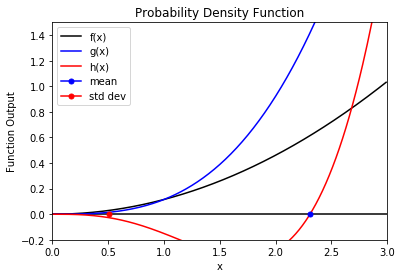

In [5]:
def f(x):
    f = (3/26)*x**2
    return f


def g(x):
    g = (3/26)*x**3
    return g


def h(x):
    h = (x-30/13)*(3/26)*x**3
    return h


x = np.ndarray.tolist(np.arange(0, 3, 0.01))
y = [f(i) for i in x]
a = [g(i) for i in x]
b = [h(i) for i in x]

# Plot based on directions in the discussion topic
plt.xlim(0, 3)
plt.ylim(-0.2, 1.5)
plt.axhline(0, color='black')
plt.plot(x, y, c='k', label='f(x)')
plt.plot(x, a, c='b', label='g(x)')
plt.plot(x, b, c='r', label='h(x)')
plt.plot(intg_g(), 0, marker='o', markersize=5, color="blue", mec="blue",
         label='mean')
plt.plot(intg_h()**0.5, 0, marker='o', markersize=5, color="red", mec="red",
         label='std dev')
plt.xlabel('x')
plt.ylabel('Function Output')
plt.title('Probability Density Function')
plt.legend(loc=2)
plt.show()

## Central Limit Theorem

At this point, we can introduce the role the normal distribution plays in the Central Limit Theorem. According to that theorem, sample means from the original probability density function will be normally distributed. I can test this by simulating 1,000 sample means of 100 simulations from the distribution. Then I plot the distribution of the means. It appears to look normal, confirming the Central Limit Theorem, but it is worth testing to be sure.

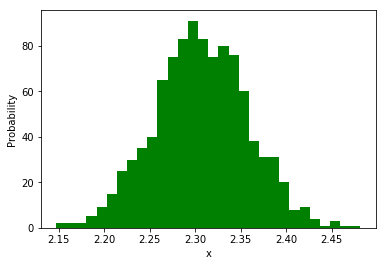

In [6]:
# Inverse CDF
def icdf(y):
    """Inverse CDF of a function."""
    x = (26*y + 1)**(1/3)
    return x


# Calcuate simulations of sample means
sample_means = []
for i in range(1000):
    sims = [icdf(j) for j in np.random.uniform(size=100)]
    sample_means.append(np.mean(sims))

# Plot histogram of sample means
plt.hist(sample_means, bins=30, color='g')
plt.ylabel("Probability")
plt.xlabel("x")
plt.show()

I use D’Agostino and Pearson’s test in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) to verify that the sample means are normally distributed. 

In [7]:
# Validate the CLT that sample means are normally distributed
p_value = normaltest(sample_means)[1]
result_text = (f"Based on the p-value of {p_value:.4f}, I cannot reject the"
               "null hypothesis that the data is normally distributed.")
print(result_text)

Based on the p-value of 0.9579, I cannot reject thenull hypothesis that the data is normally distributed.
